# Приближённое решение задачи Коши для ОДУ

Методами Эйлера, Рунге—Кутта четвертого порядка точности и методом Адамса третьего порядка найти приближённое решение задачи Коши для обыкновенного дифференциального уравнения на отрезке $ [0, 1] $.

* Реализовать функции `euler(N)`, `runge_kutta(N)`, `adams(N)`, где $ N $ -- задаваемое пользователем количество узлов сетки. Функции должны возвращать массив приближенных значений искомой функции в точках $ x_{i} = i / N, \quad i = 0, \dots, N $.

* Построить графики для приближенных решений, найденных разными методами при шаге сетки $ h = 0.05 $. Начало расчёта — точка $ x = 0 $. Графики должны быть совмещены на одном рисунке.

* На одном рисунке построить зависимость логарифма модуля отклонения численного решения от точного решения при $ x = 1 $ от логарифма шага для каждого метода.

* Для каждого метода найти ***оценку*** точности при шаге $ h = 0.05 $, используя правило Рунге. Сравнить с точностью, расчитанной с использованием точного решения $ u_{0}(x) $.

Оформить отчет.

Содержание отчета:

1. Постановка задачи
2. Результаты в виде графиков, пояснения к графикам
3. Оценка точности по методу Рунге, сравнение с точностью, расчитанной с использованием точного решения $ u_{0}(x) $
3. Выводы по результатам



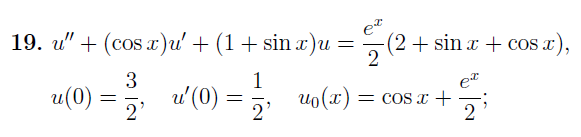

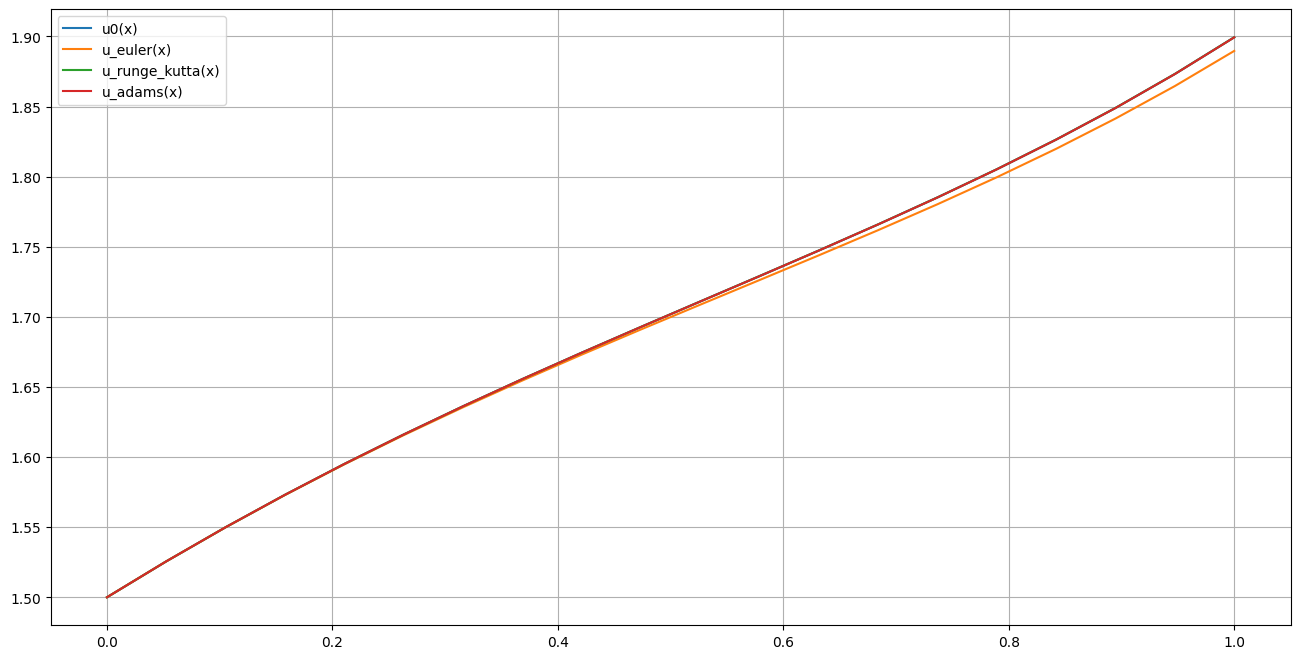

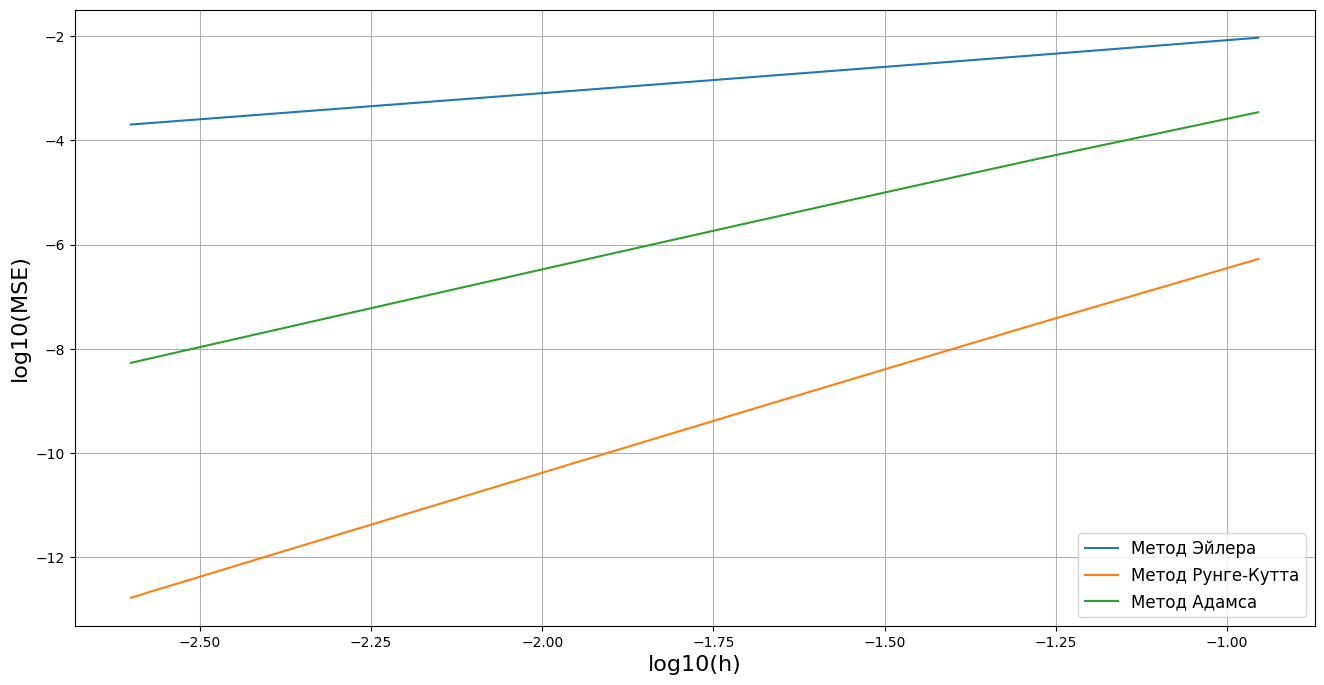

Угол наклона Эйлера = 1.0078336065571554
Угол наклона Рунге-Кутта = 3.9689737492528168
Угол наклона Адамса = 2.951550994829855
Реальное отклонение при h = 0.05 для метода Эйлера: 9.7e-03
Оценка точности при h = 0.05 для метода Эйлера:     1.5e-02
Реальное отклонение при h = 0.05 для метода Рунге-Кутта: 6.4e-08
Оценка точности при h = 0.05 для метода Рунге-Кутта:     1.7e-03
Реальное отклонение при h = 0.05 для метода Адамса: 7.6e-05
Оценка точности при h = 0.05 для метода Адамса:     3.7e-03


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# u''+cos(x)*u' + (1+sin(x))*u = exp(x)*(2+sin(x) + cos(x))/2

# функция для вычисления значения u'' на основе заданных значений u и u'
def f(x, u, v):
    return np.exp(x)*(2+np.sin(x) + np.cos(x))/2 - (1+np.sin(x))*u - np.cos(x)*v

def euler(N):
    x = np.linspace(a, b, N)
    # Шаг сетки
    h = (b-a)/(N-1)
    # Начальные условия
    u0 = 3/2 # u(0)
    v0 = 1/2 # u'(0)
    # Массив для хранения решения
    y = np.zeros((len(x), 2))
    y[0, 0], y[0, 1] = u0, v0

    for i in range(N-1):
        y[i+1, 0] = y[i, 0] + h * y[i, 1] + (h ** 2 / 2) * f(x[i], y[i, 0], y[i, 1])
        y[i+1, 1] = y[i, 1] + h * f(x[i], y[i, 0], y[i, 1])
    return y

def runge_kutta(N):
    x = np.linspace(a, b, N)
    # Шаг сетки
    h = (b-a)/(N-1)
    # Начальные условия
    u0 = 3/2 # u(0)
    v0 = 1/2 # u'(0)
    # Массив для хранения решения
    y = np.zeros((len(x), 2))
    y[0, 0], y[0, 1] = u0, v0

    for i in range(N-1):
        k1 = h*y[i, 1]
        l1 = h*f(x[i], y[i, 0], y[i, 1])

        k2 = h*(y[i, 1] + l1/2)
        l2 = h*f(x[i] + h/2, y[i, 0] + k1/2, y[i, 1] + l1/2)

        k3 = h*(y[i, 1] + l2/2)
        l3 = h*f(x[i] + h/2, y[i, 0] + k2/2, y[i, 1] + l2/2)

        k4 = h*(y[i, 1] + l3)
        l4 = h*f(x[i] + h, y[i, 0] + k3, y[i, 1] + l3)

        y[i+1, 0] = y[i, 0] + (k1 + 2*k2 + 2*k3 + k4)/6
        y[i+1, 1] = y[i, 1] + (l1 + 2*l2 + 2*l3 + l4)/6
    return y

def adams(N):
    x = np.linspace(a, b, N)
    # Шаг сетки
    h = (b-a)/(N-1)
    # Начальные условия
    u0 = 3/2 # u(0)
    v0 = 1/2 # u'(0)
    # Массив для хранения решения
    y = np.zeros((len(x), 2))
    y[0, 0], y[0, 1] = u0, v0
    y[:3,:3] = runge_kutta(N)[:3,:3]
    for i in range(2, N-1):
        y[i+1, 0] = y[i, 0] + h*(23*y[i, 1] - 16*y[i-1, 1] + 5*y[i-2, 1])/12
        y[i+1, 1] = y[i, 1] + h*(23*f(x[i], y[i, 0], y[i, 1]) - 16*f(x[i-1], y[i-1, 0], y[i-1, 1]) + 5*f(x[i-2], y[i-2, 0], y[i-2, 1]))/12
    return y

def deviation(u_cod, u0):
    delta = abs(u_cod - u0)
    return max(delta)

def analysis(N):
    Max = [0]*3
    u_euler_h = euler(N)
    u_runge_kutta_h = runge_kutta(N)
    u_adams_h = adams(N)
    N //= 2
    u_euler_h2 = euler(N)
    u_runge_kutta_h2 = runge_kutta(N)
    u_adams_h2 = adams(N)
    for i in range(N):
        delta = abs(u_euler_h[2*i, 0] - u_euler_h2[i, 0])
        if delta > Max[0]:
            Max[0] = delta
    Max[0] /= (2**1 - 1)
    for i in range(N):
        delta = abs(u_runge_kutta_h[2*i, 0] - u_runge_kutta_h2[i, 0])
        if delta > Max[1]:
            Max[1] = delta
    Max[1] /= (2**4 - 1)
    for i in range(N):
        delta = abs(u_adams_h[2*i, 0] - u_adams_h2[i, 0])
        if delta > Max[2]:
            Max[2] = delta
    Max[2] /= (2**3 - 1)
    return Max


# Интервал, на котором решаем уравнение
a, b = 0, 1
# Количество узлов сетки
# N = int(input('Введите количество узлов сетки N = '))
N = 20
x = np.linspace(a, b, N)
# Решение задачи Коши
u0 = np.cos(x) + 0.5*np.exp(x)
# Решение различными методами
u_euler = euler(N)
u_runge_kutta = runge_kutta(N)
u_adams = adams(N)
# Построение графиков решений
plt.rcParams ['figure.figsize'] = [16, 8]
plt.plot(x, u0, label='u0(x)')
plt.plot(x, u_euler[:, 0], label='u_euler(x)')
plt.plot(x, u_runge_kutta[:, 0], label='u_runge_kutta(x)')
plt.plot(x, u_adams[:, 0], label='u_adams(x)')
plt.legend()
plt.grid()
plt.show()

# MSE
error_e = []
error_r = []
error_a = []
h = []
for N in range(10, 401, 10):
    h.append((b-a)/(N-1))
    x = np.linspace(a, b, N)
    u0 = np.cos(x) + 0.5*np.exp(x)

    # Погрешность Эйлера
    u_euler = euler(N)
    error = 0
    for i in range(N):
      error += (u0[i] - u_euler[i, 0])**2
    error /= N
    error_e.append(error**0.5)

    # Погрешность Рунге-Кутта
    u_runge_kutta = runge_kutta(N)
    error = 0
    for i in range(N):
      error += (u0[i] - u_runge_kutta[i, 0])**2
    error /= N
    error_r.append(error**0.5)

    # Погрешность Адамса
    u_adams = adams(N)
    error = 0
    for i in range(N):
      error += (u0[i] - u_adams[i, 0])**2
    error /= N
    error_a.append(error**0.5)

# Построение графиков MSE
plt.plot(np.log10(h), np.log10(error_e), label='Метод Эйлера')
plt.plot(np.log10(h), np.log10(error_r), label='Метод Рунге-Кутта')
plt.plot(np.log10(h), np.log10(error_a), label='Метод Адамса')
plt.legend(loc='lower right', fontsize='large')
plt.xlabel('log10(h)', fontsize=16)
plt.ylabel('log10(MSE)', fontsize=16)
plt.grid()
plt.show()

print('Угол наклона Эйлера =', np.polyfit(np.log10(h), np.log10(error_e), 1)[0])
print('Угол наклона Рунге-Кутта =', np.polyfit(np.log10(h), np.log10(error_r), 1)[0])
print('Угол наклона Адамса =', np.polyfit(np.log10(h), np.log10(error_a), 1)[0])

# Оценки точности
N = 20
x = np.linspace(a, b, N)
u0 = np.cos(x) + 0.5*np.exp(x)
u_euler = euler(N)
u_runge_kutta = runge_kutta(N)
u_adams = adams(N)
print(f'Реальное отклонение при h = 0.05 для метода Эйлера: {deviation(u_euler[:, 0], u0):.1e}')
print(f'Оценка точности при h = 0.05 для метода Эйлера:     {analysis(N)[0]:.1e}')
print(f'Реальное отклонение при h = 0.05 для метода Рунге-Кутта: {deviation(u_runge_kutta[:, 0], u0):.1e}')
print(f'Оценка точности при h = 0.05 для метода Рунге-Кутта:     {analysis(N)[1]:.1e}')
print(f'Реальное отклонение при h = 0.05 для метода Адамса: {deviation(u_adams[:, 0], u0):.1e}')
print(f'Оценка точности при h = 0.05 для метода Адамса:     {analysis(N)[2]:.1e}')